# Testing code for cost function "elasticity" on the annulus

In [1]:
%pylab inline

import dionysus

Populating the interactive namespace from numpy and matplotlib


## Constructing the annulus and combuting the cocycle

(-2.16566476917887, 2.145668838729803, -2.179494442103798, 2.1997135202118656)

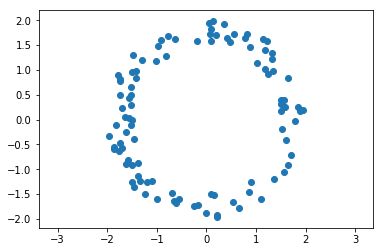

In [2]:
R = 1.5
d = .5
n = 100

# r in [0,1]
# th in [0,2pi)

from math import sin, cos, pi
from random import uniform
def rand_annulus_pt():
    r = uniform(0,1)
    th = uniform(0,2*pi)
    return (R+r*d) * cos(th), (R+r*d) * sin(th)
annulus = np.array([(rand_annulus_pt()) for x in range(100)])
plt.scatter(*annulus.T)
plt.axis('equal')

In [3]:
prime = 19
vr = dionysus.fill_rips(annulus, 2, 4.)
cp = dionysus.cohomology_persistence(vr, prime, True)
dgms = dionysus.init_diagrams(cp, vr)

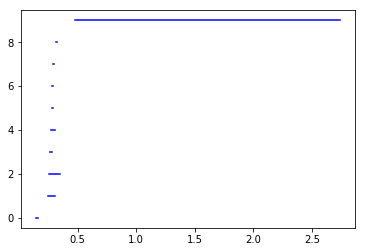

In [4]:
dionysus.plot.plot_bars(dgms[1], show=True)

In [5]:
bars = [bar for bar in dgms[1] if bar.death > 1.]
bars

[(0.477987,2.73923)]

In [6]:
cocycles = [cp.cocycle(bar.data) for bar in bars]
vr_8 = dionysus.Filtration([s for s in vr if s.data <= 1.0])
coords = [dionysus.smooth(vr_8, cocycle, prime) for cocycle in cocycles]

(-2.16566476917887, 2.145668838729803, -2.179494442103798, 2.1997135202118656)

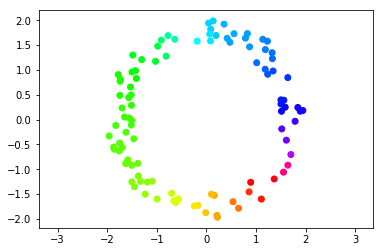

In [7]:
# subplot(121)#, projection="3d")
scatter(*annulus.T, c=coords[0], cmap="hsv")
plt.axis('equal')

# subplot(122)#, projection="3d")
# scatter(*annulus.T, c=coords[1], cmap="hsv")

## Extract and optimize

In [91]:
D = {}
data = {}
indexing = {}
ix = [0]*50
thr = 3
for s in vr:
    if s.dimension() == 0:
        continue
    elif s.data > thr:
        break
    D.setdefault(s.dimension(),[[],[]])
    data.setdefault(s.dimension(),[])
    indexing.setdefault(s.dimension(),{})
    indexing.setdefault(s.dimension()-1,{})
    if not s in indexing[s.dimension()]:
        indexing[s.dimension()][s] = ix[s.dimension()]
        ix[s.dimension()] += 1
    for dat, k in enumerate(s.boundary()): 
        if not k in indexing[s.dimension()-1]:
            indexing[s.dimension()-1][k] = ix[s.dimension()-1]
            ix[s.dimension()-1] += 1
        D[s.dimension()][0].append(indexing[s.dimension()][s]) #rows
        D[s.dimension()][1].append(indexing[s.dimension()-1][k]) #cols
        if dat%2:
            data[s.dimension()].append(-1)
        else:
            data[s.dimension()].append(1)
import scipy as sp
CBd = [sp.sparse.csr_matrix((data[d], (D[d][0], D[d][1]))).todense() for d in range(1,max(D.keys())+1)]

In [92]:
n, m = CBd[0].shape
l = array([1])

f = np.zeros((n,1))
for c2 in cocycles[0]:
    f[indexing[1][vr[c2.index]]] = c2.element
bdry = CBd[0]

In [90]:
l2_cocycle = [0]*len(coords[0])
for i, coeff in enumerate(coords[0]):
    l2_cocycle[indexing[0][dionysus.Simplex([i],0)]] = coeff

In [16]:
cocycle = array(l2_cocycle)

In [82]:
from scipy import optimize

def cost(z):
    cc = f.T + bdry @ z
    return norm(cc, 2)
    #return norm(cc) + alpha * norm(bdry @ z)
    #return norm(cc) + alpha * norm(z)


In [83]:
result = optimize.minimize(cost, l2_cocycle)
result

      fun: 163.46185630159076
 hess_inv: array([[ 1.20359135,  0.13572676, -0.03039256, ..., -0.08596751,
         0.1933602 , -0.03666059],
       [ 0.13572676,  1.14723673, -0.03013712, ..., -0.080524  ,
         0.16978254, -0.05281217],
       [-0.03039256, -0.03013712,  1.03701834, ...,  0.01566834,
        -0.13837973, -0.06279052],
       ...,
       [-0.08596751, -0.080524  ,  0.01566834, ...,  1.07410354,
        -0.05662448,  0.02724782],
       [ 0.1933602 ,  0.16978254, -0.13837973, ..., -0.05662448,
         1.8053442 ,  0.18227308],
       [-0.03666059, -0.05281217, -0.06279052, ...,  0.02724782,
         0.18227308,  1.19470253]])
      jac: array([-9.53674316e-06, -5.72204590e-06,  1.90734863e-06,  1.90734863e-06,
       -1.90734863e-06,  0.00000000e+00,  0.00000000e+00, -1.90734863e-06,
        0.00000000e+00, -1.90734863e-06, -3.81469727e-06,  1.90734863e-06,
        7.62939453e-06,  0.00000000e+00,  1.90734863e-06,  1.90734863e-06,
        1.90734863e-06,  3.81469727

In [84]:
cost(zeros(100))

198.26245232015063

(-2.16566476917887, 2.145668838729803, -2.179494442103798, 2.1997135202118656)

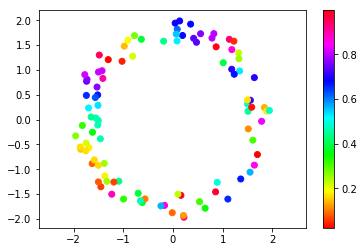

In [94]:
messed_ix = [indexing[0][dionysus.Simplex([n],0)] for n in range(100)]
color = mod(result.x[messed_ix], 1.0)
#color = mod(array(l2_cocycle)[messed_ix], 1.0)
scatter(*annulus.T, c=color, cmap="hsv")
plt.colorbar()
plt.axis('equal')

(array([4., 3., 4., 6., 3., 6., 7., 4., 2., 5., 8., 4., 4., 4., 3., 6., 9.,
        6., 5., 7.]),
 array([0.00366133, 0.05233439, 0.10100746, 0.14968053, 0.1983536 ,
        0.24702666, 0.29569973, 0.3443728 , 0.39304587, 0.44171894,
        0.490392  , 0.53906507, 0.58773814, 0.63641121, 0.68508427,
        0.73375734, 0.78243041, 0.83110348, 0.87977655, 0.92844961,
        0.97712268]),
 <a list of 20 Patch objects>)

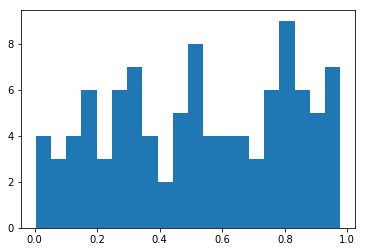

In [81]:
plt.hist(color, bins= 20)